<div style="text-align: right">CSCI-E7 Introduction to Python for Life Sciences, Lecture 7</div>
<div style="text-align: right">Prof. Dino Konstantopoulos, 1 April 2019</div>

This is a *data* lecture! Almost no code folks :-)

# Data Analysis with Pandas & more with friends-of-pandas

`pandas` is a Python package providing fast, flexible, and expressive data structures designed to work with relational or labeled (hierarchical) data or both. It is a fundamental high-level building block for doing practical, real world, scientific, data analysis in Python.

![Protein Strucure with Sugar](data/LysozymeRock.gif)

`pandas` is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet

- Ordered and unordered (not necessarily fixed-frequency) *time series* (1D) data

- Arbitrary *matrix* (2 and higher D) data (homogeneously typed or heterogeneous) with row and column labels

- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

Key features are:

- Shape mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

- Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically

- Intuitive merging and joining of data sets

- Flexible reshaping and pivoting of data sets

- Robust IO tools for loading data from flat files, Excel files, databases, HDF5, etc.

- Build-in statistics and linear regressions, extensible with additional packages (e.g. statsmodels)

After this lecture, chances are you will never use Excel functions to analyze data anymore, and instead you will import your excel spreadsheet into a notebook and use pandas & friends for your data analysis :-)

### The friends of pandas

Matplotlib, seaborn, numpy, statsmodels, scipy, scikit-learn


# 1. Introduction to pandas *Series*

In [1]:
#Series Lab
import pandas as pd

In [2]:
obj = pd.Series([10,20,30,40,50])
obj

0    10
1    20
2    30
3    40
4    50
dtype: int64

Do you see how the series automatically gets its own index?

In [3]:
obj.values

array([10, 20, 30, 40, 50])

In [4]:
obj.index

RangeIndex(start=0, stop=5, step=1)

We can also specify an index that we pick:

In [5]:
obj = pd.Series([10,20,30,40,50], index = ['a', 'b', 'c', 'd', 'e'])
obj

a    10
b    20
c    30
d    40
e    50
dtype: int64

We can query data with predicates as index:

In [6]:
obj[obj > 20]

c    30
d    40
e    50
dtype: int64

We can analyze games, too:

In [7]:
nba = {'Celtics': 3, "Warriors": 4}
data = pd.Series(nba)
data

Celtics     3
Warriors    4
dtype: int64

Hmm.. I think we need more than one dimension to analyze the NBA. Once we increase the number of dimensions, we move on pandas' `DataFrame`:

# 2. Introduction to pandas *DataFrames*

Let's import data as a dictionary structure:

In [8]:
nba = {"east": ['Celtics', "Cavs", "76ers"], "west": ["Warriors", "Lakers", "Chicago"]}
nbadf = pd.DataFrame(nba)
nbadf

,east,west
0,Celtics,Warriors
1,Cavs,Lakers
2,76ers,Chicago


Note: We will be doing excel manipulations in Pandas with DataFrames

In [9]:

# But does this work?
nba = {"east": ['Celtics', "Cavs"], "west": ["Warriors", "Lakers", "Chicago"]}
nbadf = pd.DataFrame(nba)
nbadf

ValueError: arrays must all be same length

Oh no! What to do?

In [10]:
# ..so do this instead, and pandas adds 'None' or 'NaN' where data's missing
nbadf = pd.DataFrame.from_dict(nba, orient='index')
nbadf

,0,1,2
east,Celtics,Cavs,None
west,Warriors,Lakers,Chicago


reference a row = x.loc or location

In [12]:
nbadf.loc['east']

0    Celtics
1       Cavs
2       None
Name: east, dtype: object

If we add dictionaries as the data itself, this gives pandas the opportunity to add data-specified indexes as rows and columns:

In [13]:
nba2 = {"east": {'MA': 'Celtics', 'IN': "Cavs"}, "west": {"CA": "Warriors", "CAS": "Lakers", "IL": "Chicago"}}
nbadf = pd.DataFrame(nba2)
nbadf

,east,west
CA,NaN,Warriors
CAS,NaN,Lakers
IL,NaN,Chicago
IN,Cavs,NaN
MA,Celtics,NaN


In [14]:
nbadf.T

,CA,CAS,IL,IN,MA
east,NaN,NaN,NaN,Cavs,Celtics
west,Warriors,Lakers,Chicago,NaN,NaN


In [15]:
nbadf.columns

Index(['east', 'west'], dtype='object')

In [16]:
nbadf.index

Index(['CA', 'CAS', 'IL', 'IN', 'MA'], dtype='object')

Let's reindex:

Reshaping the range

In [18]:
obj2 = nbadf.reindex(['MA', 'IN', 'IL', 'CA', 'CAS'])
obj2

,east,west
MA,Celtics,NaN
IN,Cavs,NaN
IL,NaN,Chicago
CA,NaN,Warriors
CAS,NaN,Lakers


Can we work with data independently of indexes? Yes, using numpy matrices!

Let's use python's `arange` to create a range of numbers, and `reshape` to shape the dimensions of our dataset:

In [19]:
import numpy as np
nba3 = np.arange(0,9).reshape(3,3)
nba3

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

And let's attach the data to rows and columns to give it a context!

In [20]:
nbadf3 = pd.DataFrame(nba3, index=['MA', 'NY', 'TX'], columns=['Celtics', 'Knicks', 'Rockets'])
nbadf3

,Celtics,Knicks,Rockets
MA,0,1,2
NY,3,4,5
TX,6,7,8


In [21]:
# this looks.. fake. Let's use random number generator in matrix to make the data look more real!
nbadf3 = pd.DataFrame(np.random.randn(3,3), index=['MA', 'NY', 'TX'], columns=['Celtics', 'Knicks', 'Rockets'])
nbadf3

,Celtics,Knicks,Rockets
MA,0.223673,-0.247420,-0.802969
NY,0.938440,-1.087346,0.572441
TX,1.107931,1.459927,-2.291660


How do we apply math formulas to the data like we do it in excel?

In [22]:
# formula as lambda
f = lambda x: x.max() - x.min()
nbadf3.apply(f)

Celtics    0.884258
Knicks     2.547273
Rockets    2.864101
dtype: float64

In [23]:
nbadf3.apply(f, axis = 'columns')

MA    1.026642
NY    2.025786
TX    3.751587
dtype: float64

# 3. Finance with pandas

So, finance has nothing to do with life sciences, but it's so cool, now that you know how to manipulate notebooks, to discover that your can do all your financial strategizing from within a notebook with the help of pandas, that I cannot not show you how to do this!

In [24]:
# better do this in an anaconda terminal on windows or bash shell on mac
!conda install pandas_datareader

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - pandas_datareader

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [25]:
# better do this in an anaconda terminal on windows or bash shell on mac
!pip install pandas_datareader

    100% |████████████████████████████████| 112kB 355kB/s ta 0:00:01


In [26]:
#from pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 30)
aapl = web.DataReader('AAPL', 'iex', start, end)
aapl.head()

,open,high,low,close,volume
date,,,,,
2016-01-04,96.9111,99.5159,96.3350,99.4989,67649387
2016-01-05,99.8767,99.9711,96.7222,97.0055,55790992
2016-01-06,94.9749,96.6844,94.3233,95.1072,68457388
2016-01-07,93.1993,94.5688,91.0743,91.0932,81094428
2016-01-08,93.0766,93.6055,91.3860,91.5749,70798016


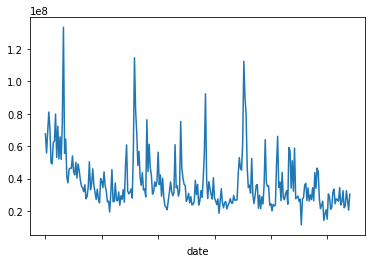

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
vol = aapl['volume']
vol.plot()

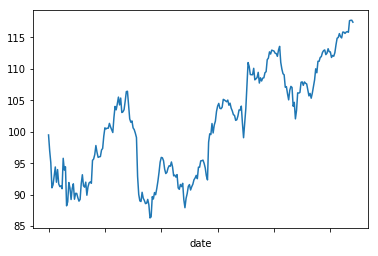

In [28]:
close = aapl['close']
close.plot()

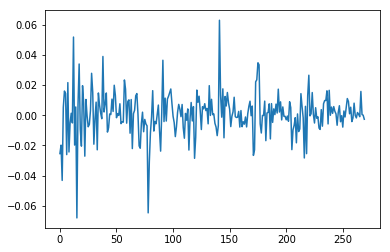

In [29]:
import numpy as np
returns = np.diff(np.log(close))
plt.plot(returns)

In [30]:
vol.corr(close)
# a value of 0.3 essentially means little correlation..

-0.34242621791083355

Wow, I can analyze the stock market with pandas, numpy, and matplotlib!

Yes, for free! Or you can pay lots of money to Fidelity Investments, who will turn to their programmers to give you the same tools you can use in a python notebook!

# 4. Interactive learning with pandas

If you decide by the end of the semester that your python-for-life-sciences professor really sucked because you learned nothing, then you can google for good python videos on youtube, view them in a notebook, and do the computations while the instructor is talking.

Now that's what I call **accelerated learning**!

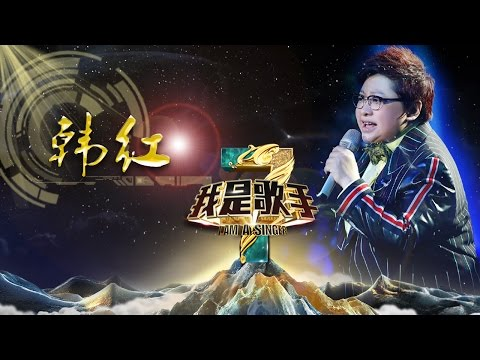

In [31]:
from IPython.display import YouTubeVideo
YouTubeVideo('npQSre0yLSI')

That is how i learned how to sing! I add all songs in my repertoire in a python notebook, keep the music score and notes underneath (even download DAW programs and run them in my notebook), and review all material very interactively!

# 5. Data aggregation & pivoting with pandas

Let's load some gaming data and do *very basic* statistical analysis.

In [32]:
df = pd.read_csv('data/pokemon_data.csv')
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


Reindex:

sorts by Type 1 first then HP

In [34]:
df2 = df.sort_values(['Type 1', 'HP'])
df2.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
462,415,Combee,Bug,Flying,30,30,42,30,42,70,4,False
603,543,Venipede,Bug,Poison,30,45,59,30,39,57,5,False
314,290,Nincada,Bug,Ground,31,45,90,30,30,40,3,False
51,46,Paras,Bug,Grass,35,70,55,45,55,25,1,False
446,401,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False
732,664,Scatterbug,Bug,NaN,38,35,40,27,25,35,6,False
16,13,Weedle,Bug,Poison,40,35,30,20,20,50,1,False
179,165,Ledyba,Bug,Flying,40,20,30,40,80,55,2,False


Add a column:

In [35]:
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314


Rearrange columns:

Still not sure about this command...

In [36]:
cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]]
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


wow, better than excel!

In fact, let's save our data as a spreadsheet:

In [37]:
df.to_excel('data/pokemon.xlsx', index=False)

Let's filter our data:

In [38]:
df3 = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]
df3.reset_index(drop=True, inplace=True)
df3

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
1,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
2,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
3,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
4,591,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5,False


### Aggregation

Let's do aggreate statistics with GROUP_BY:

In [39]:
df4 = df.groupby(['Type 1', 'Type 2']).count()
df4.head(20)

#  Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                             
Bug    Electric   2     2      2   2       2        2        2        2   
       Fighting   2     2      2   2       2        2        2        2   
       Fire       2     2      2   2       2        2        2        2   
       Flying    14    14     14  14      14       14       14       14   
       Ghost      1     1      1   1       1        1        1        1   
       Grass      6     6      6   6       6        6        6        6   
       Ground     2     2      2   2       2        2        2        2   
       Poison    12    12     12  12      12       12       12       12   
       Rock       3     3      3   3       3        3        3        3   
       Steel      7     7      7   7       7        7        7        7   
       Water      1     1      1   1       1        1        1        1   
Dark   Dragon     3     3      3   3       3        3        3        3   
       Fighting   2     2      2   2       2        2        2        2   
       Fire       3     3      3   3       3        3        3        3   
       Flying     5     5      5   5       5        5        5        5   
       Ghost      2     2      2   2       2        2        2        2   
       Ice        2     2      2   2       2        2        2        2   
       Psychic    2     2      2   2       2        2        2        2   
       Steel      2     2      2   2       2        2        2        2   
Dragon Electric   1     1      1   1       1        1        1        1   

                 Speed  Generation  Legendary  
Type 1 Type 2                                  
Bug    Electric      2           2          2  
       Fighting      2           2          2  
       Fire          2           2          2  
       Flying       14          14         14  
       Ghost         1           1          1  
       Grass         6           6          6  
       Ground        2           2          2  
       Poison       12          12         12  
       Rock          3           3          3  
       Steel         7           7          7  
       Water         1           1          1  
Dark   Dragon        3           3          3  
       Fighting      2           2          2  
       Fire          3           3          3  
       Flying        5           5          5  
       Ghost         2           2          2  
       Ice           2           2          2  
       Psychic       2           2          2  
       Steel         2           2          2  
Dragon Electric      1           1          1

In [40]:
df4 = df.groupby(['Type 1', 'Type 2']).sum()
df4.head(20)

#  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                                 
Bug    Electric  1191    791  120     124      110      154      110    173   
       Fighting   428   1100  160     310      190       80      200    160   
       Fire      1273    910  140     145      120      185      160    160   
       Flying    4008   5873  882     982      862     1020      967   1160   
       Ghost      292    236    1      90       45       30       30     40   
       Grass     2129   2304  330     443      460      344      460    267   
       Ground     703    690   91     124      195       89      115     76   
       Poison    2390   4175  645     820      697      510      712    791   
       Rock      1328   1305  140     170      440      110      340    105   
       Steel     2912   3568  474     803      787      477      583    444   
       Water      283    269   40      30       32       50       52     65   
Dark   Dragon    1902   1320  216     255      210      235      210    194   
       Fighting  1119    836  115     165      185       80      185    106   
       Fire       686   1430  195     240      170      330      220    275   
       Flying    2604   2470  466     461      369      421      352    401   
       Ghost      604    860  100     160      200      150      180     70   
       Ice        676    940  125     215      120       80      160    240   
       Psychic   1373    770  139     146      141      105      121    118   
       Steel     1249    830  110     210      170      100      110    130   
Dragon Electric   644    680  100     150      120      120      100     90   

                 Generation  Legendary  
Type 1 Type 2                           
Bug    Electric          10        0.0  
       Fighting           4        0.0  
       Fire              10        0.0  
       Flying            40        0.0  
       Ghost              3        0.0  
       Grass             21        0.0  
       Ground             7        0.0  
       Poison            28        0.0  
       Rock              12        0.0  
       Steel             25        0.0  
       Water              3        0.0  
Dark   Dragon            15        0.0  
       Fighting          10        0.0  
       Fire               6        0.0  
       Flying            22        1.0  
       Ghost              6        0.0  
       Ice                6        0.0  
       Psychic           12        0.0  
       Steel             10        0.0  
Dragon Electric           5        1.0

In [41]:
df4 = df.groupby(['Type 1', 'Type 2']).mean()
df4.head(20)

#       Total          HP      Attack     Defense  \
Type 1 Type 2                                                                 
Bug    Electric  595.500000  395.500000   60.000000   62.000000   55.000000   
       Fighting  214.000000  550.000000   80.000000  155.000000   95.000000   
       Fire      636.500000  455.000000   70.000000   72.500000   60.000000   
       Flying    286.285714  419.500000   63.000000   70.142857   61.571429   
       Ghost     292.000000  236.000000    1.000000   90.000000   45.000000   
       Grass     354.833333  384.000000   55.000000   73.833333   76.666667   
       Ground    351.500000  345.000000   45.500000   62.000000   97.500000   
       Poison    199.166667  347.916667   53.750000   68.333333   58.083333   
       Rock      442.666667  435.000000   46.666667   56.666667  146.666667   
       Steel     416.000000  509.714286   67.714286  114.714286  112.428571   
       Water     283.000000  269.000000   40.000000   30.000000   32.000000   
Dark   Dragon    634.000000  440.000000   72.000000   85.000000   70.000000   
       Fighting  559.500000  418.000000   57.500000   82.500000   92.500000   
       Fire      228.666667  476.666667   65.000000   80.000000   56.666667   
       Flying    520.800000  494.000000   93.200000   92.200000   73.800000   
       Ghost     302.000000  430.000000   50.000000   80.000000  100.000000   
       Ice       338.000000  470.000000   62.500000  107.500000   60.000000   
       Psychic   686.500000  385.000000   69.500000   73.000000   70.500000   
       Steel     624.500000  415.000000   55.000000  105.000000   85.000000   
Dragon Electric  644.000000  680.000000  100.000000  150.000000  120.000000   

                    Sp. Atk     Sp. Def       Speed  Generation  Legendary  
Type 1 Type 2                                                               
Bug    Electric   77.000000   55.000000   86.500000    5.000000        0.0  
       Fighting   40.000000  100.000000   80.000000    2.000000        0.0  
       Fire       92.500000   80.000000   80.000000    5.000000        0.0  
       Flying     72.857143   69.071429   82.857143    2.857143        0.0  
       Ghost      30.000000   30.000000   40.000000    3.000000        0.0  
       Grass      57.333333   76.666667   44.500000    3.500000        0.0  
       Ground     44.500000   57.500000   38.000000    3.500000        0.0  
       Poison     42.500000   59.333333   65.916667    2.333333        0.0  
       Rock       36.666667  113.333333   35.000000    4.000000        0.0  
       Steel      68.142857   83.285714   63.428571    3.571429        0.0  
       Water      50.000000   52.000000   65.000000    3.000000        0.0  
Dark   Dragon     78.333333   70.000000   64.666667    5.000000        0.0  
       Fighting   40.000000   92.500000   53.000000    5.000000        0.0  
       Fire      110.000000   73.333333   91.666667    2.000000        0.0  
       Flying     84.200000   70.400000   80.200000    4.400000        0.2  
       Ghost      75.000000   90.000000   35.000000    3.000000        0.0  
       Ice        40.000000   80.000000  120.000000    3.000000        0.0  
       Psychic    52.500000   60.500000   59.000000    6.000000        0.0  
       Steel      50.000000   55.000000   65.000000    5.000000        0.0  
Dragon Electric  120.000000  100.000000   90.000000    5.000000        1.0

In [42]:
df5 = df4.head(20)[cols[4:7]]
df5

HP      Attack     Defense
Type 1 Type 2                                      
Bug    Electric   60.000000   62.000000   55.000000
       Fighting   80.000000  155.000000   95.000000
       Fire       70.000000   72.500000   60.000000
       Flying     63.000000   70.142857   61.571429
       Ghost       1.000000   90.000000   45.000000
       Grass      55.000000   73.833333   76.666667
       Ground     45.500000   62.000000   97.500000
       Poison     53.750000   68.333333   58.083333
       Rock       46.666667   56.666667  146.666667
       Steel      67.714286  114.714286  112.428571
       Water      40.000000   30.000000   32.000000
Dark   Dragon     72.000000   85.000000   70.000000
       Fighting   57.500000   82.500000   92.500000
       Fire       65.000000   80.000000   56.666667
       Flying     93.200000   92.200000   73.800000
       Ghost      50.000000   80.000000  100.000000
       Ice        62.500000  107.500000   60.000000
       Psychic    69.500000   73.000000   70.500000
       Steel      55.000000  105.000000   85.000000
Dragon Electric  100.000000  150.000000  120.000000

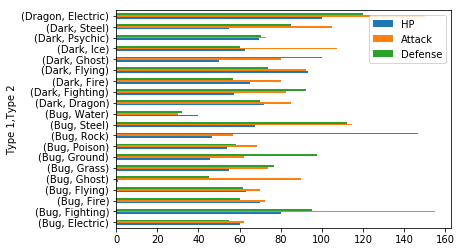

In [43]:
df5.plot(kind='barh')

In [46]:
zscore = lambda x: (x - x.mean()) / x.std()
df5.apply(zscore)

HP    Attack   Defense
Type 1 Type 2                                
Bug    Electric -0.017866 -0.789752 -0.841476
       Fighting  0.956942  2.333057  0.595768
       Fire      0.469538 -0.437177 -0.661821
       Flying    0.128355 -0.516327 -0.605358
       Ghost    -2.893547  0.150448 -1.200787
       Grass    -0.261567 -0.392406 -0.062969
       Ground   -0.724601 -0.789752  0.685595
       Poison   -0.322493 -0.577088 -0.730689
       Rock     -0.667737 -0.968838  2.452208
       Steel     0.358131  0.980319  1.221995
       Water    -0.992673 -1.864267 -1.667892
Dark   Dragon    0.567019 -0.017445 -0.302510
       Fighting -0.139717 -0.101391  0.505940
       Fire      0.225836 -0.185338 -0.781591
       Flying    1.600314  0.224321 -0.165972
       Ghost    -0.505269 -0.185338  0.775423
       Ice       0.103985  0.738073 -0.661821
       Psychic   0.445168 -0.420388 -0.284544
       Steel    -0.261567  0.654127  0.236457
Dragon Electric  1.931749  2.165164  1.494045

### Pivoting

In [55]:
import pandas as pd

# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('data/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

merge:

In [56]:
# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [57]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [58]:
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

Let's look at how these movies are viewed across different age groups. First, let's look at how age is distributed amongst our users.

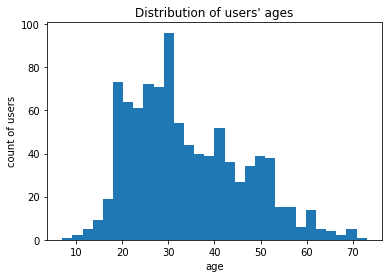

In [59]:
import matplotlib.pyplot as plt

users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

Binning our users into age groups with `pandas.cut`:

In [60]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [61]:
import numpy as np
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

Young users seem a bit more critical than other age groups. Let's look at how the 50 most rated movies are viewed across each age group.

Let's only look at the 50 most rated movies. Let's make a Series of movies that meet this threshold

In [62]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

In [63]:
lens.set_index('movie_id', inplace=True)

In [64]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

see the data as a table? Each title as a row, each age group as a column, and the average rating in each cell?

In [65]:
by_age.rating.mean().unstack(0).fillna(0)

title,Air Force One (1997),Alien (1979),Aliens (1986),Apollo 13 (1995),Back to the Future (1985),"Birdcage, The (1996)",Braveheart (1995),Conspiracy Theory (1997),Contact (1997),Dead Man Walking (1995),...,Star Trek: First Contact (1996),Star Wars (1977),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),Twelve Monkeys (1995),Twister (1996),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971)
age_group,,,,,,,,,,,,,,,,,,,,,
0-9,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000
10-19,3.647059,4.111111,4.050000,3.954545,4.037037,3.217391,4.384615,3.565217,3.693878,3.647059,...,3.576923,4.630435,4.173913,3.619048,4.611111,3.621622,3.916667,3.000000,3.500000,3.387097
20-29,3.666667,4.026087,4.087719,3.845455,3.720588,3.413223,4.194915,3.382114,3.785714,3.926606,...,3.641975,4.413043,3.969466,3.875969,4.336066,3.920635,3.847458,3.200000,4.000000,3.820144
30-39,3.570000,4.103448,3.887640,4.064935,3.915789,3.514286,4.156627,3.419355,3.847458,3.814286,...,3.737864,4.305732,3.977011,4.105882,4.236111,4.033058,3.788462,3.133333,3.882353,3.908046
40-49,3.555556,3.833333,3.526316,3.822222,4.036364,3.500000,4.051282,3.465116,3.866667,3.754386,...,3.760000,4.166667,4.212121,3.975610,3.984848,3.700000,3.653846,3.479167,3.825000,3.058824
50-59,3.750000,4.272727,4.235294,4.187500,3.500000,3.346154,3.956522,3.538462,3.739130,4.294118,...,3.272727,4.469388,3.941176,3.900000,4.210526,3.758621,3.650000,3.300000,3.904762,2.857143
60-69,3.666667,3.500000,3.800000,3.750000,3.857143,3.888889,3.714286,2.600000,3.777778,4.000000,...,3.000000,4.000000,3.500000,3.600000,3.846154,3.400000,3.000000,3.250000,3.800000,3.000000
70-79,3.666667,4.000000,3.000000,4.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,5.000000,4.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,4.500000,0.000000


In [66]:
by_age.rating.mean().unstack(1).fillna(0)[0:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Apollo 13 (1995),4.0,3.954545,3.845455,4.064935,3.822222,4.187500,3.750000,4.000000
Back to the Future (1985),0.0,4.037037,3.720588,3.915789,4.036364,3.500000,3.857143,4.000000
"Birdcage, The (1996)",0.0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.000000
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.000000
Conspiracy Theory (1997),0.0,3.565217,3.382114,3.419355,3.465116,3.538462,2.600000,0.000000
Contact (1997),5.0,3.693878,3.785714,3.847458,3.866667,3.739130,3.777778,0.000000


Which movies do men and women most disagree on? Wes McKinney basically went through the exact same question in his book. It's a good, yet simple example of pivot_table, so I'm going to leave it here. Seriously though, go buy the book. DataFrame's have a pivot_table method that makes these kinds of operations much easie

In [67]:
lens.reset_index('movie_id', inplace=True)

In [68]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [69]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [70]:
pivoted.reset_index('movie_id', inplace=True)

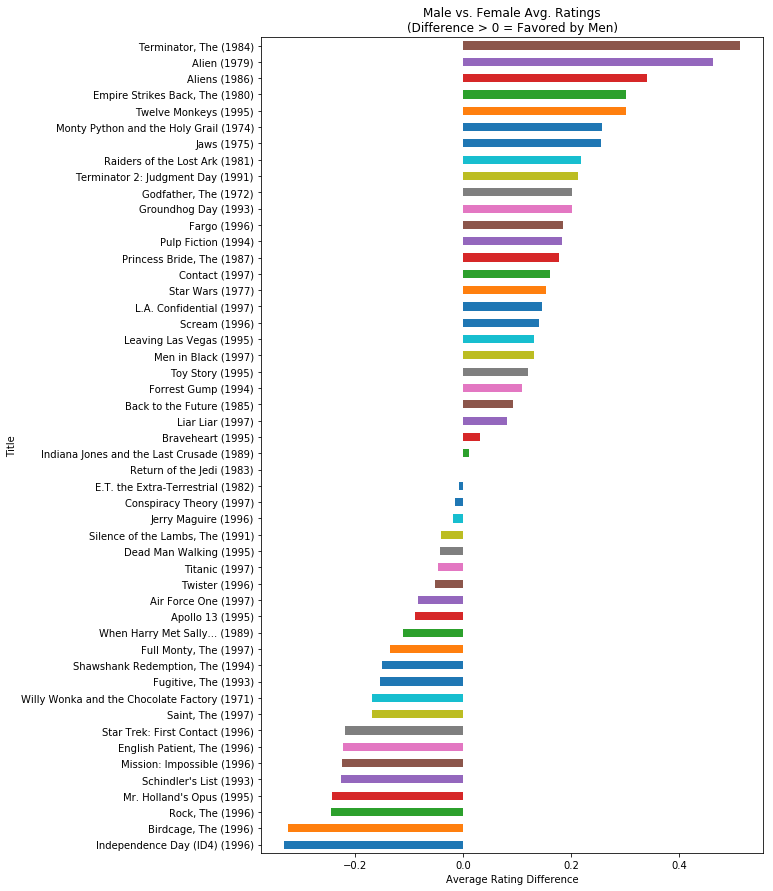

In [71]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

# 6. Statistics with pandas & friends

`statsmodels` is a cool statistics library that also includes sample datasets for us to play with. Now *that's* accelerated learning!

In [72]:
import statsmodels.api as sm
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
df.head(10)

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
5,1705.0,58.0
6,1706.0,29.0
7,1707.0,20.0
8,1708.0,10.0
9,1709.0,8.0


In [73]:
df.tail(10)

,YEAR,SUNACTIVITY
299,1999.0,93.3
300,2000.0,119.6
301,2001.0,111.0
302,2002.0,104.0
303,2003.0,63.7
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


Wow, that's sunspots data, from the 18th century to.. 2008! in fact, Galileo first documented sunspots in the 1600s, using his newly invented telescope, and reliable sunspot observations begin in about 1700.

When did fractional years start appearing? Take the modulo of each value with 1 to get the fractional part (lambda x: x % 1), using the `.apply()` API on the `df['SUNACTIVITY']` column. 

In [74]:
fractional_nums = df['SUNACTIVITY'].apply(lambda x: x % 1) #Take the modulo of each value with 1 to get the fractional part
fractional_nums[fractional_nums > 0].head()

49    0.9
50    0.4
51    0.7
52    0.8
53    0.7
Name: SUNACTIVITY, dtype: float64

Get a sense of the distribution of the values:

In [75]:
df['SUNACTIVITY'].describe()

count    309.000000
mean      49.752104
std       40.452595
min        0.000000
25%       16.000000
50%       40.000000
75%       69.800000
max      190.200000
Name: SUNACTIVITY, dtype: float64

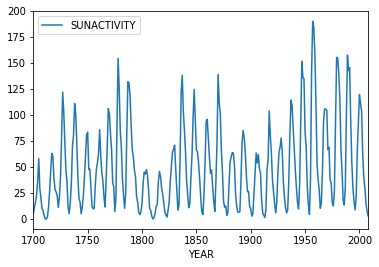

In [76]:
df.plot(x='YEAR', y='SUNACTIVITY', xlim=(1700,2008))

Looks like there's a cycle (increase --> decrease --> increase --> decrease --> etc.) going on. What's its period?

/Users/daflow312/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


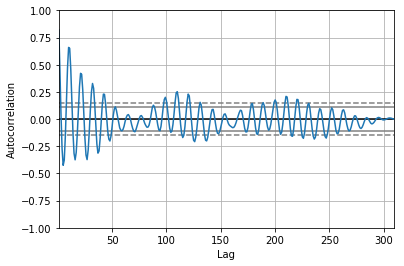

In [77]:
pd.tools.plotting.autocorrelation_plot(df['SUNACTIVITY'])

If we were in a data science class, I would ask you to fit a (theoretical) model to the data. Instead, I just want to show you the power of `pandas` and friends (`numpy`, `scipy`, `statsmodels`, `matplotlib`, ..) in doing science with just a few lines of code:

In [78]:
print(df.shape)
N2 = df.shape[0] / 2
freqs = np.linspace(0, 0.5, num=N2, endpoint=False)[1:] #Nyquist range

(309, 2)


/Users/daflow312/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


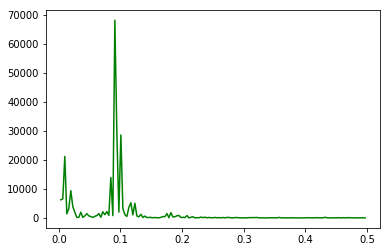

In [79]:
import scipy as sp
periodogram = sp.signal.lombscargle(df['YEAR'], df['SUNACTIVITY'], freqs * 2 * np.pi)
plt.plot(freqs, periodogram, color='green')

In [80]:
freq_index_at_max_power = np.argmax(periodogram)
print('Frequency and corresponding time in years at max power: %.2f, %.1f' % (freqs[freq_index_at_max_power], 1 / freqs[freq_index_at_max_power]))

Frequency and corresponding time in years at max power: 0.09, 11.0


So the major cycle is about 11 years, and the minor cycle at a just over a month.

Wow, correlation is really cool. It allows us to find patterns and dependencies in data. In fact, it's the underlying paradigm in Machine Learning. 

Can we find any correlations in our gaming data above?

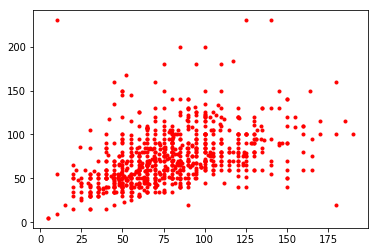

In [81]:
df = pd.read_csv('data/pokemon_data.csv')
attack = df['Attack']
defense = df['Defense']
plt.plot(attack, defense, 'r.')

How about for really good players?

In [82]:
df_g = df.loc[(df['Speed'] > 60) & (df['HP'] > 70)]
df_g.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
22,18,Pidgeot,Normal,Flying,83,80,75,70,70,101,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False
33,28,Sandslash,Ground,NaN,75,100,110,45,55,65,1,False


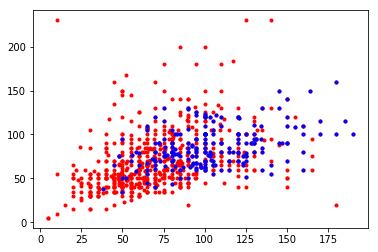

In [88]:
attack_g = df_g['Attack']
defense_g = df_g['Defense']
plt.plot(attack, defense, 'r.', label='all')
plt.plot(attack_g, defense_g, 'b.', label='good')

Change the . to a + after the r (stands for red) or b(stands for black) and it changes the data point

Outliers can really skew your data. We need a way to find out if there are outliers in our data, remove them, and then look again at correlations.

In [89]:
# make a copy of original df
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Attack'] - newdf['Attack'].mean())
newdf['1.96*std'] = 1.96*newdf['Attack'].std()  
newdf['Outlier'] = abs(newdf['Attack'] - newdf['Attack'].mean()) > 1.96*newdf['Attack'].std()
newdf.loc[(newdf['Outlier'] == True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,70.99875,63.616437,True
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,74.00125,63.616437,True
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False,75.99875,63.616437,True
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False,69.00125,63.616437,True
141,130,GyaradosMega Gyarados,Water,Dark,95,155,109,70,130,81,1,False,75.99875,63.616437,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,110.99875,63.616437,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,70.99875,63.616437,True
229,212,ScizorMega Scizor,Bug,Steel,70,150,140,65,100,75,2,False,70.99875,63.616437,True
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,69.00125,63.616437,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,105.99875,63.616437,True


In [90]:
!pip install prettypandas

  Running setup.py bdist_wheel for prettypandas ... done
  Stored in directory: /Users/daflow312/Library/Caches/pip/wheels/64/d7/40/8ef47e2709290e78f521aa91afb480758ce3d1b12881cc2f29
Successfully built prettypandas


In [91]:
from prettypandas import PrettyPandas
PrettyPandas(newdf                                   # Prettyprints pandas dataframes
    .head(10)                                    # Sample the first 10 rows
    [[c for c in newdf.columns if "Sp." not in c]] # Ignore columns with "Sp." in the name (don't know what it means)
)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
0,1,Bulbasaur,Grass,Poison,45,49,49,45,1,False,30.0012,63.6164,False
1,2,Ivysaur,Grass,Poison,60,62,63,60,1,False,17.0012,63.6164,False
2,3,Venusaur,Grass,Poison,80,82,83,80,1,False,2.99875,63.6164,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,1,False,20.9988,63.6164,False
4,4,Charmander,Fire,nan,39,52,43,65,1,False,27.0012,63.6164,False
5,5,Charmeleon,Fire,nan,58,64,58,80,1,False,15.0012,63.6164,False
6,6,Charizard,Fire,Flying,78,84,78,100,1,False,4.99875,63.6164,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,100,1,False,50.9988,63.6164,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,100,1,False,24.9988,63.6164,False
9,7,Squirtle,Water,nan,44,48,65,43,1,False,31.0012,63.6164,False


In [92]:
PrettyPandas(newdf[newdf["Attack"]>=180])

/Users/daflow312/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,110.999,63.6164,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,105.999,63.6164,True
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,100.999,63.6164,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,100.999,63.6164,True
429,386,DeoxysAttack Forme,Psychic,nan,50,180,20,180,20,150,3,True,100.999,63.6164,True


But Average and Standard Deviation are only valid for gaussian distributions!

In [93]:
# make a copy of original df
newdf3 = df.copy()

Attack = newdf3.groupby('Attack')

newdf3['Lower'] = Attack['Attack'].transform( lambda x: x.quantile(q=.25) - (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf3['Upper'] = Attack['Attack'].transform( lambda x: x.quantile(q=.75) + (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf3['Outlier'] = (newdf3['Attack'] < newdf3['Lower']) | (newdf3['Attack'] > newdf3['Upper']) 
newdf3.loc[(newdf3['Outlier'] == True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Lower,Upper,Outlier


# 7. Graphing with pandas & friends

### Scatter Plots

Scatter plots are great for showing the relationship between two variables since you can directly see the raw distribution of the data. You can also view this relationship for different groups of data simple by colour coding the groups as seen in the first figure below. Want to visualize the relationship between three variables? No problemo! Just use another parameters, like point size, to encode that third variable

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris = sns.load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris = sns.load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [107]:
setosa = iris.loc[iris['species'] == 'setosa']
versicolor = iris.loc[iris['species'] == 'versicolor']
virginica = iris.loc[iris['species'] == 'virginica']

Text(0, 0.5, 'sepal width')

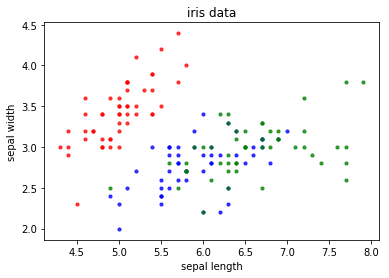

In [108]:
x1_data = setosa.sepal_length
y1_data = setosa.sepal_width

x2_data = versicolor.sepal_length
y2_data = versicolor.sepal_width

x3_data = virginica.sepal_length
y3_data = virginica.sepal_width

x_label = 'sepal length'
y_label = 'sepal width'
title = "iris data"
color = 'r'
yscale_log = False

# Create the plot object
_, ax = plt.subplots()

# Plot the data, set the size (s), color and transparency (alpha)
# of the points
ax.scatter(x1_data, y1_data, s = 10, color = 'r', alpha = 0.75)
ax.scatter(x2_data, y2_data, s = 10, color = 'b', alpha = 0.75)
ax.scatter(x3_data, y3_data, s = 10, color = 'g', alpha = 0.75)

if yscale_log == True:
    ax.set_yscale('log')

# Label the axes and provide a title
ax.set_title(title)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

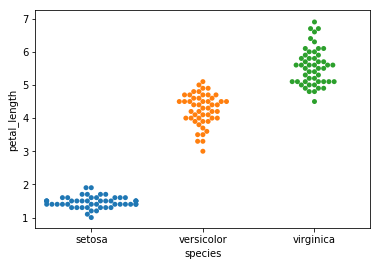

In [109]:
sns.swarmplot(x='species', y='petal_length', data = iris)

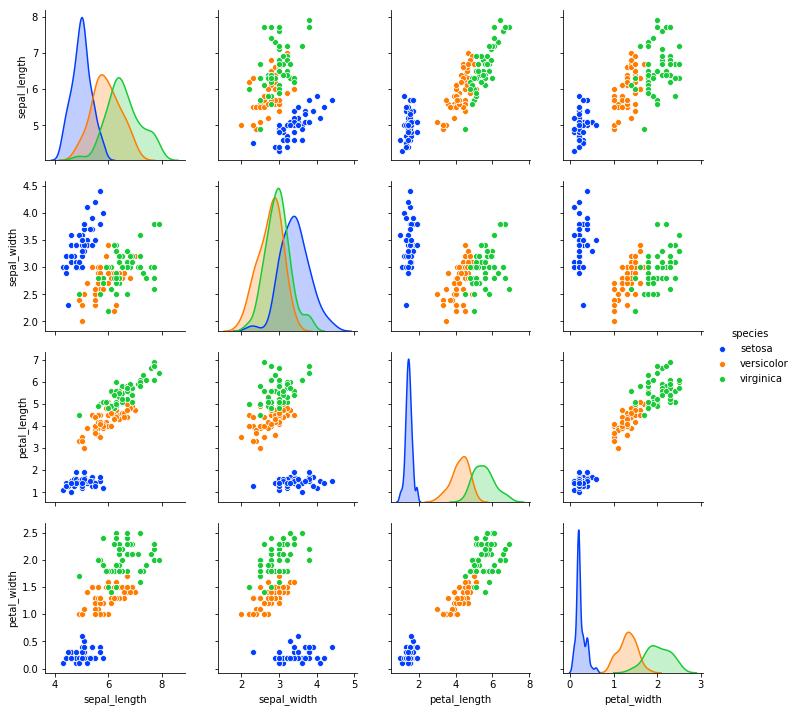

In [110]:
sns.pairplot(iris, hue="species",palette="bright")

### Histograms

Histograms are essential to data science, because you understand the **distribution** of your datasets. Understanding how your data is distributed is **key** to being able to fit it to a **model**.

A model for your data is a function that autoencodes your data. In other words, it is able to learn from your data, and to be able to output your data given a much smaller input. That way, you keep your model and you can throw away the data.

Your brain is, in fact, a model builder. It learns all your past interactions between you and your husband or best friend, and enables you to sidestep all future conflict (well, for some of us, our brain does *not* work that well ;-). How does it do that? Given the input of a potentially conflict-causing conditions, it is able to predict the future conflict, and thus devise strategies to avoid this cascading development.

What's your most basic example of a model?

How about an addition coroutine?

Text(0.5, 1.0, 'Defense')

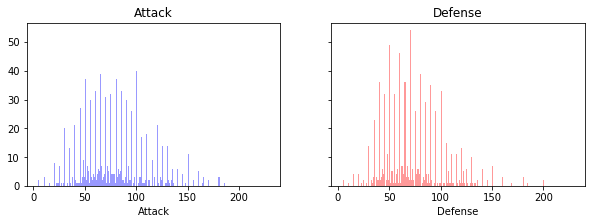

In [111]:
import seaborn as sns

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,3),sharey=True,sharex=True)
sns.distplot(newdf3["Attack"], ax=ax1,
             bins=range(newdf3["Attack"].min(), newdf3["Attack"].max()),
             kde=False,
             color="b")
ax1.set_title("Attack")
sns.distplot(newdf3["Defense"], ax=ax2,
             bins=range(newdf3["Defense"].min(), newdf3["Defense"].max()),
             kde=False,
             color="r")
ax2.set_title("Defense")

NameError: name 'Fale' is not defined

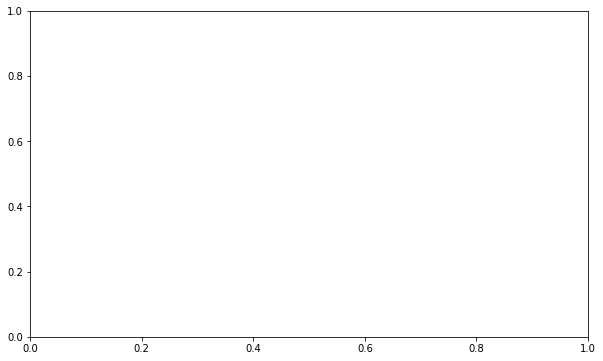

In [114]:
fig,ax1 = plt.subplots(nrows=1,figsize=(10,6),sharex=True)

# Plot the age distributions of males and females on the same axis
sns.distplot(newdf3["Attack"], ax=ax1,
             bins=range(newdf3["Attack"].min(), newdf3["Attack"].max()),
             kde=Fale,
             color="b",
             label="Attack")
sns.distplot(newdf3["Defense"], ax=ax1,
             bins=range(newdf3["Defense"].min(), newdf3["Defense"].max()),
             kde=False,
             color="r",
             label="Defense")

### Matrix Visualizations

We played with linear algebra together. Specifically, I told you a lot of life sciences data is in the form of graphs, and that graphs are determined by adjacency matrices. Also, transfer matrices allow us to build state machines and to examine long-term behavior of such state machines.

`Clustergrammer` is a web-based tool for visualizing high-dimensional data (e.g. a matrix) as an interactive and shareable hierarchically clustered heatmap. Developed by the Ma'ayan lab at the Icahn School of Medicine In New York City. Clustergrammer's front end (Clustergrammer-JS) is built using [D3.js](https://d3js.org/) and its back-end (Clustergrammer-PY) is built using Python. Clustergrammer produces highly interactive visualizations that enable intuitive exploration of high-dimensional data and has several biology-specific features to facilitate the exploration of gene-level biological data.

Fernandez, N. F. et al. Clustergrammer, a web-based heatmap visualization and analysis tool for high-dimensional biological data. Sci. Data 4:170151 doi: [10.1038/sdata.2017.151 (2017)](https://www.nature.com/articles/sdata2017151).

In [115]:
!pip install clustergrammer_widget

    100% |████████████████████████████████| 655kB 284kB/s ta 0:00:01


  Running setup.py bdist_wheel for clustergrammer-widget ... done
  Stored in directory: /Users/daflow312/Library/Caches/pip/wheels/ca/c0/d6/34dedd777453899090ebcc4c3837fa45ad313329e360361ba7
Successfully built clustergrammer-widget


In [117]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [118]:
!jupyter nbextension enable --py --sys-prefix clustergrammer_widget

Enabling notebook extension clustergrammer_widget/extension...
      - Validating: OK


In [128]:
# import widget classes and instantiate Network instance
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [120]:
# import widget classes and instantiate Network instance
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [129]:
import numpy as np
import pandas as pd

# generate random matrix
num_rows = 16
num_cols = 16
np.random.seed(seed=100)
mat = np.random.rand(num_rows, num_cols)

# make row and col labels
rows = range(num_rows)
cols = range(num_cols)
rows = [str(i) for i in rows]
cols = [str(i) for i in cols]

# make dataframe 
df = pd.DataFrame(data=mat, columns=cols, index=rows)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.543405,0.278369,0.424518,0.844776,0.004719,0.121569,0.670749,0.825853,0.136707,0.575093,0.891322,0.209202,0.185328,0.108377,0.219697,0.978624
1,0.811683,0.171941,0.816225,0.274074,0.431704,0.940030,0.817649,0.336112,0.175410,0.372832,0.005689,0.252426,0.795663,0.015255,0.598843,0.603805
2,0.105148,0.381943,0.036476,0.890412,0.980921,0.059942,0.890546,0.576901,0.742480,0.630184,0.581842,0.020439,0.210027,0.544685,0.769115,0.250695
3,0.285896,0.852395,0.975006,0.884853,0.359508,0.598859,0.354796,0.340190,0.178081,0.237694,0.044862,0.505431,0.376252,0.592805,0.629942,0.142600
4,0.933841,0.946380,0.602297,0.387766,0.363188,0.204345,0.276765,0.246536,0.173608,0.966610,0.957013,0.597974,0.731301,0.340385,0.092056,0.463498
5,0.508699,0.088460,0.528035,0.992158,0.395036,0.335596,0.805451,0.754349,0.313066,0.634037,0.540405,0.296794,0.110788,0.312640,0.456979,0.658940
6,0.254258,0.641101,0.200124,0.657625,0.778289,0.779598,0.610328,0.309000,0.697735,0.859618,0.625324,0.982408,0.976500,0.166694,0.023178,0.160745
7,0.923497,0.953550,0.210978,0.360525,0.549375,0.271831,0.460602,0.696162,0.500356,0.716071,0.525956,0.001399,0.394700,0.492167,0.402880,0.354298
8,0.500614,0.445177,0.090433,0.273563,0.943477,0.026545,0.039999,0.283140,0.582344,0.990893,0.992642,0.993117,0.110048,0.664481,0.523987,0.173150
9,0.942960,0.241860,0.998932,0.582694,0.183279,0.386845,0.189674,0.410771,0.594680,0.716586,0.486891,0.309590,0.577441,0.441708,0.359678,0.321332


In [130]:
net.load_df(df)
net.cluster(enrichrgram=False)
net.widget()

clustergrammer_widget(network='{"row_nodes": [{"name": "0", "ini": 16, "clust": 2, "rank": 0, "rankvar": 12, "…

In [132]:
# load matrix file
net.load_file('data/rc_two_cats.txt')

# cluster using default parameters
net.cluster(enrichrgram=True)

# make interactive widget
net.widget()

clustergrammer_widget(network='{"row_nodes": [{"name": "Gene: CDK4", "ini": 38, "clust": 14, "rank": 30, "rank…

# 8. Machine Learning with pandas & friends

`Pandas` allows gives us easy integration with the `scikit-learn` library. 

# 1. Decision Trees and regression trees

The idea is to split a dataset based on **homogeneity of data**. A **decision tree** is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar **values** (homogenous). 

On the other hand, in a **regression tree**, since the target (dependent) variable is a real valued number, we fit a regression model to the target variable using each of the independent variables. 

Then for each independent variable, the data is split at several split points. We calculate Sum of Squared Error(SSE) at each split point between the predicted value and the actual values. The variable resulting in minimum SSE is selected for the node. Then this process is recursively continued till the entire data is covered. Each split point may belong to a different independent variable.

All of us actually use decision trees in our daily life! To illustrate the concept, let's use an everyday example: predicting tomorrow’s maximum temperature for Boston. Wasn't today so much colder than yesterday?!

In order to answer the single max temperature question, we need to work through an entire series of queries. We start by forming an initial reasonable range given our domain knowledge, which for Boston is very little.. Let's say that it's 30–60 degrees Fahrenheit. Gradually, through a set of questions and answers we will reduce this range until we are confident enough to make a single prediction.

What makes a good question to start with? What kind of idnependent variable should we split the data by? Well, if we want to limit the range **as much as possible** initially, let's think of the most relevant question to ask. Since temperature is highly dependent on time of year, a decent place to start would be: what season are we in? Winter *close to spring*, right? So we can limit the prediction range to 30–50 degrees because we have an idea of what the general max temperatures are in Boston winter-close-to-spring-time (yes, yesterday was 60 but that was an outlier). This first question already cuts our range by a lot. We use that independent variable as our first node variable. But, this question isn’t quite enough to narrow down our estimate so we need to find out more information for our second node.

A good follow-up question is: what is the historical average max temperature on this day? For Boston, the answer is 36 degrees. This allows us to further restrict our range of consideration to, let's say, 30–40 degrees. 

Two questions (two nodes)  are still not quite enough to make a prediction because this year might be warmer or colder than average. Therefore, we also would want to look at the max temperature today to get an idea if the year has been unusually warm or cold. Our question is simple: what is the maximum temperature today? If the max temperature today was 40 degrees, it might be colder this year and our estimate for tomorrow should be a little lower than the historical average. At this point, we can feel pretty confident in making a prediction of 35 degrees for the max temperature tomorrow. 

So, to arrive at an estimate, we used a series of questions, with each question narrowing our possible values until we were confident enough to make a single prediction. So, following one path (the most probable one) down the tree, we used 3 nodes to make a decision. 

We also need to complete all paths and add nodes to all split points so we have a decision for each leaf of the tree (we did not do this in our questioning above).

**Regression Forests** are different than a single tree: They are an **ensemble** of different regression trees. These models work on the principle of the **wisdom of the crowd** . In short, it is better to consider the opinions of 1000 different people with not much knowledge than to consider the opinion of only one expert (provided the 1000 people have accuracy better than random guessing, i.e more than 50%). There is actually a mathematical proff about this.

Ok, is our intuition about the algorithm in place?

In [134]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [135]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [136]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [142]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

In [149]:
!pip install -U scikit-learn


    100% |████████████████████████████████| 8.0MB 606kB/s ta 0:00:011
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [140]:
%%time
param_grid = dict(
    max_features=np.arange(2, 8),
    max_depth=[2, 4],
    min_samples_split=[5, 10, 15, 20],
)
rfc = RandomForestRegressor(n_estimators=10)
gs = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
gs.fit(X.values, y.values)

NameError: name 'GridSearchCV' is not defined

In [ ]:
scores = gs.grid_scores_
scores[:10]

In [ ]:
pd.Series(gs.best_estimator_.feature_importances_,
          index=X.columns).sort_values().plot(kind='barh')

# 9. Your pandas Homework

Locate a biological dataset (e.g. from sciki-learn), analyze and print the important data on it, decide on the dependent variable, and find the best independent discriminator for it. In other words, repeat exercise above for a *different* dataset.